Contents

01 Import libraries and data

02 Clean data

03 Prepare for regression

04 Run regression analysis

05 Find and remove outliers

06 Run regression analysis with cleaned dataframe

01 Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Display graphs in line

%matplotlib inline

In [6]:
#create path for data import
path = r'/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 6'

In [12]:
#import data file
df = pd.read_csv(os.path.join(path, 'Cleaned_data.csv'))

In [14]:
#check output
df.head()

,Unnamed: 0,Entity,Code,Year,"Country, Year",Schizophrenia_percent,Bipolar_percent,Eating_percent,Anxiety_percent,Drug_percent,...,Age 50-69,Age 70+,Age 15-49,Age Standardized,Males_percent,Females_percent,Population,Suicide_deaths_per_100K,Depression_per_100K,Number with depression
0,0,Afghanistan,AFG,1990,"Afghanistan, 1990",0.160560,0.697779,0.101855,4.828830,1.677082,...,5.917752,5.202803,4.939766,4.071831,3.499982,4.647815,12412000,10.318504,4039.755763,318435.8137
1,1,Afghanistan,AFG,1991,"Afghanistan, 1991",0.160312,0.697961,0.099313,4.829740,1.684746,...,5.927093,5.192849,4.902682,4.079531,3.503947,4.655772,13299000,10.327010,4046.256034,329044.7740
2,2,Afghanistan,AFG,1992,"Afghanistan, 1992",0.160135,0.698107,0.096692,4.831108,1.694334,...,5.945656,5.176872,4.837097,4.088358,3.508912,4.662066,14486000,10.271411,4053.709902,382544.5729
3,3,Afghanistan,AFG,1993,"Afghanistan, 1993",0.160037,0.698257,0.094336,4.830864,1.705320,...,5.966915,5.167355,4.813657,4.096190,3.513429,4.669012,15817000,10.376123,4060.203474,440381.5074
4,4,Afghanistan,AFG,1994,"Afghanistan, 1994",0.160022,0.698469,0.092439,4.829423,1.716069,...,5.975907,5.157549,4.839340,4.099582,3.515578,4.673050,17076000,10.575915,4062.290365,456916.6455


In [16]:
#remove index column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
#check output
df.head()

,Entity,Code,Year,"Country, Year",Schizophrenia_percent,Bipolar_percent,Eating_percent,Anxiety_percent,Drug_percent,Depression_percent,...,Age 50-69,Age 70+,Age 15-49,Age Standardized,Males_percent,Females_percent,Population,Suicide_deaths_per_100K,Depression_per_100K,Number with depression
0,Afghanistan,AFG,1990,"Afghanistan, 1990",0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,...,5.917752,5.202803,4.939766,4.071831,3.499982,4.647815,12412000,10.318504,4039.755763,318435.8137
1,Afghanistan,AFG,1991,"Afghanistan, 1991",0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,...,5.927093,5.192849,4.902682,4.079531,3.503947,4.655772,13299000,10.327010,4046.256034,329044.7740
2,Afghanistan,AFG,1992,"Afghanistan, 1992",0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,...,5.945656,5.176872,4.837097,4.088358,3.508912,4.662066,14486000,10.271411,4053.709902,382544.5729
3,Afghanistan,AFG,1993,"Afghanistan, 1993",0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,...,5.966915,5.167355,4.813657,4.096190,3.513429,4.669012,15817000,10.376123,4060.203474,440381.5074
4,Afghanistan,AFG,1994,"Afghanistan, 1994",0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,...,5.975907,5.157549,4.839340,4.099582,3.515578,4.673050,17076000,10.575915,4062.290365,456916.6455


In [25]:
df.columns

Index(['Entity', 'Code', 'Year', 'Country, Year', 'Schizophrenia_percent',
       'Bipolar_percent', 'Eating_percent', 'Anxiety_percent', 'Drug_percent',
       'Depression_percent', 'Alcohol_percent', 'All Ages', 'Age 10-14',
       'Age 15-19', 'Age 20-24', 'Age 25-29', 'Age 30-34', 'Age 50-69',
       'Age 70+', 'Age 15-49', 'Age Standardized', 'Males_percent',
       'Females_percent', 'Population', 'Suicide_deaths_per_100K',
       'Depression_per_100K', 'Number with depression'],
      dtype='object')

In [112]:
df.shape

(6468, 27)

02 Clean Data

In [27]:
# Check for missing values

df.isnull().sum()
#Entity values that are not countries do not have codes. This field will not be necessary for the regression.

Entity                       0
Code                       980
Year                         0
Country, Year                0
Schizophrenia_percent        0
Bipolar_percent              0
Eating_percent               0
Anxiety_percent              0
Drug_percent                 0
Depression_percent           0
Alcohol_percent              0
All Ages                     0
Age 10-14                    0
Age 15-19                    0
Age 20-24                    0
Age 25-29                    0
Age 30-34                    0
Age 50-69                    0
Age 70+                      0
Age 15-49                    0
Age Standardized             0
Males_percent                0
Females_percent              0
Population                   0
Suicide_deaths_per_100K      0
Depression_per_100K          0
Number with depression       0
dtype: int64

In [29]:
#check for duplicates
dups = df.duplicated()

In [31]:
dups.shape # No duplicates

(6468,)

/var/folders/ys/d72m3mmn3kxcfr0s6frmm81w0000gn/T/ipykernel_20271/3532229704.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Suicide_deaths_per_100K'], bins=25)


<Axes: xlabel='Suicide_deaths_per_100K', ylabel='Density'>

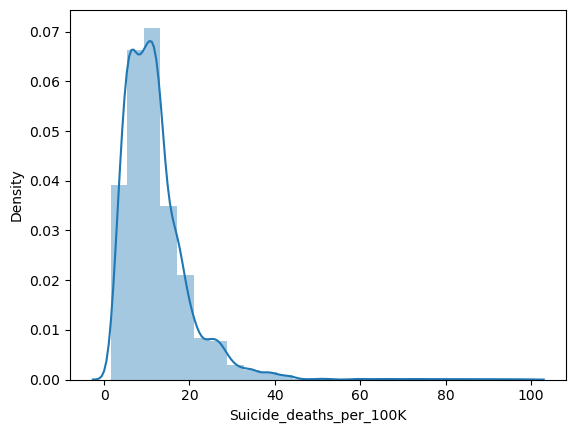

In [33]:
#check for extreme values
sns.distplot(df['Suicide_deaths_per_100K'], bins=25)

#This suggests the possibility of high outliers, but we're not sure if they are true outliers. Let's check measures of central tendency to get more info.


In [35]:
#check mean
df['Suicide_deaths_per_100K'].mean()

12.068239982863327

In [37]:
#check median
df['Suicide_deaths_per_100K'].median()

10.66853123

In [39]:
#check max
df['Suicide_deaths_per_100K'].max()
#98.8 is a high maximum compared to the dataset as a whole. Let's look at how many extreme values we have

98.83169616

In [41]:
# Check how many extreme values

df[df['Suicide_deaths_per_100K'] > 40]

,Entity,Code,Year,"Country, Year",Schizophrenia_percent,Bipolar_percent,Eating_percent,Anxiety_percent,Drug_percent,Depression_percent,...,Age 50-69,Age 70+,Age 15-49,Age Standardized,Males_percent,Females_percent,Population,Suicide_deaths_per_100K,Depression_per_100K,Number with depression
1712,Eastern Europe,NaN,1994,"Eastern Europe, 1994",0.190333,0.674720,0.196110,2.936288,0.832262,4.018495,...,7.206251,9.033738,4.361465,4.018495,3.231428,4.596699,0,43.182570,3802.953299,9.920691e+06
1713,Eastern Europe,NaN,1995,"Eastern Europe, 1995",0.190041,0.674840,0.193320,2.936742,0.841803,4.029205,...,7.242310,9.027975,4.394538,4.029205,3.249334,4.601523,0,42.750860,3812.802603,9.956283e+06
2240,Greenland,GRL,1990,"Greenland, 1990",0.322297,0.589591,0.481743,5.618805,1.692208,6.282583,...,6.294092,4.176848,9.245809,6.282583,4.703362,8.151786,56000,98.831696,5804.372145,3.549368e+03
2241,Greenland,GRL,1991,"Greenland, 1991",0.320174,0.589740,0.480503,5.628190,1.685110,6.382405,...,6.343659,4.196417,9.385547,6.382405,4.765410,8.267927,56000,96.085164,5896.535170,3.575367e+03
2242,Greenland,GRL,1992,"Greenland, 1992",0.318373,0.590087,0.479355,5.637049,1.679329,6.472683,...,6.389381,4.235716,9.495474,6.472683,4.821883,8.376009,56000,93.230629,5979.525887,3.578386e+03
2243,Greenland,GRL,1993,"Greenland, 1993",0.317009,0.590331,0.477928,5.641694,1.678518,6.539495,...,6.430134,4.240585,9.575569,6.539495,4.866115,8.458938,56000,91.071428,6040.269833,3.576850e+03
2244,Greenland,GRL,1994,"Greenland, 1994",0.316124,0.590683,0.476551,5.644656,1.678047,6.582469,...,6.449205,4.246620,9.617917,6.582469,4.894211,8.515622,56000,89.225496,6078.706709,3.584122e+03
2245,Greenland,GRL,1995,"Greenland, 1995",0.315753,0.590903,0.476540,5.648279,1.678836,6.602754,...,6.459741,4.255659,9.626314,6.602754,4.905163,8.537801,56000,87.051938,6096.437594,3.591430e+03
2246,Greenland,GRL,1996,"Greenland, 1996",0.315904,0.591282,0.476873,5.651103,1.693140,6.601250,...,6.442584,4.261051,9.596353,6.601250,4.901353,8.535388,56000,85.707803,6093.678845,3.586251e+03
2247,Greenland,GRL,1997,"Greenland, 1997",0.316404,0.591425,0.479072,5.656238,1.727403,6.598258,...,6.427948,4.267584,9.567272,6.598258,4.890720,8.527468,56000,84.585821,6088.973114,3.580072e+03


In [43]:
df[df['Suicide_deaths_per_100K'] > 60]

,Entity,Code,Year,"Country, Year",Schizophrenia_percent,Bipolar_percent,Eating_percent,Anxiety_percent,Drug_percent,Depression_percent,...,Age 50-69,Age 70+,Age 15-49,Age Standardized,Males_percent,Females_percent,Population,Suicide_deaths_per_100K,Depression_per_100K,Number with depression
2240,Greenland,GRL,1990,"Greenland, 1990",0.322297,0.589591,0.481743,5.618805,1.692208,6.282583,...,6.294092,4.176848,9.245809,6.282583,4.703362,8.151786,56000,98.831696,5804.372145,3549.367984
2241,Greenland,GRL,1991,"Greenland, 1991",0.320174,0.589740,0.480503,5.628190,1.685110,6.382405,...,6.343659,4.196417,9.385547,6.382405,4.765410,8.267927,56000,96.085164,5896.535170,3575.366649
2242,Greenland,GRL,1992,"Greenland, 1992",0.318373,0.590087,0.479355,5.637049,1.679329,6.472683,...,6.389381,4.235716,9.495474,6.472683,4.821883,8.376009,56000,93.230629,5979.525887,3578.386025
2243,Greenland,GRL,1993,"Greenland, 1993",0.317009,0.590331,0.477928,5.641694,1.678518,6.539495,...,6.430134,4.240585,9.575569,6.539495,4.866115,8.458938,56000,91.071428,6040.269833,3576.849630
2244,Greenland,GRL,1994,"Greenland, 1994",0.316124,0.590683,0.476551,5.644656,1.678047,6.582469,...,6.449205,4.246620,9.617917,6.582469,4.894211,8.515622,56000,89.225496,6078.706709,3584.122215
2245,Greenland,GRL,1995,"Greenland, 1995",0.315753,0.590903,0.476540,5.648279,1.678836,6.602754,...,6.459741,4.255659,9.626314,6.602754,4.905163,8.537801,56000,87.051938,6096.437594,3591.430256
2246,Greenland,GRL,1996,"Greenland, 1996",0.315904,0.591282,0.476873,5.651103,1.693140,6.601250,...,6.442584,4.261051,9.596353,6.601250,4.901353,8.535388,56000,85.707803,6093.678845,3586.250725
2247,Greenland,GRL,1997,"Greenland, 1997",0.316404,0.591425,0.479072,5.656238,1.727403,6.598258,...,6.427948,4.267584,9.567272,6.598258,4.890720,8.527468,56000,84.585821,6088.973114,3580.072110
2248,Greenland,GRL,1998,"Greenland, 1998",0.317109,0.591568,0.480106,5.659557,1.770310,6.586734,...,6.391619,4.266310,9.524585,6.586734,4.874544,8.513516,56000,82.868456,6075.992497,3572.551137
2249,Greenland,GRL,1999,"Greenland, 1999",0.317813,0.591782,0.481587,5.659526,1.805187,6.569485,...,6.349370,4.266651,9.474226,6.569485,4.856441,8.499266,56000,80.842430,6058.271445,3560.111815


In [45]:
df[df['Suicide_deaths_per_100K'] > 80]
#The highest values are all from Greenland in the 1990s. It might be worth examining why Greenland had such a high suicide rate during that time, but for now, let's leave the data in place

,Entity,Code,Year,"Country, Year",Schizophrenia_percent,Bipolar_percent,Eating_percent,Anxiety_percent,Drug_percent,Depression_percent,...,Age 50-69,Age 70+,Age 15-49,Age Standardized,Males_percent,Females_percent,Population,Suicide_deaths_per_100K,Depression_per_100K,Number with depression
2240,Greenland,GRL,1990,"Greenland, 1990",0.322297,0.589591,0.481743,5.618805,1.692208,6.282583,...,6.294092,4.176848,9.245809,6.282583,4.703362,8.151786,56000,98.831696,5804.372145,3549.367984
2241,Greenland,GRL,1991,"Greenland, 1991",0.320174,0.589740,0.480503,5.628190,1.685110,6.382405,...,6.343659,4.196417,9.385547,6.382405,4.765410,8.267927,56000,96.085164,5896.535170,3575.366649
2242,Greenland,GRL,1992,"Greenland, 1992",0.318373,0.590087,0.479355,5.637049,1.679329,6.472683,...,6.389381,4.235716,9.495474,6.472683,4.821883,8.376009,56000,93.230629,5979.525887,3578.386025
2243,Greenland,GRL,1993,"Greenland, 1993",0.317009,0.590331,0.477928,5.641694,1.678518,6.539495,...,6.430134,4.240585,9.575569,6.539495,4.866115,8.458938,56000,91.071428,6040.269833,3576.849630
2244,Greenland,GRL,1994,"Greenland, 1994",0.316124,0.590683,0.476551,5.644656,1.678047,6.582469,...,6.449205,4.246620,9.617917,6.582469,4.894211,8.515622,56000,89.225496,6078.706709,3584.122215
2245,Greenland,GRL,1995,"Greenland, 1995",0.315753,0.590903,0.476540,5.648279,1.678836,6.602754,...,6.459741,4.255659,9.626314,6.602754,4.905163,8.537801,56000,87.051938,6096.437594,3591.430256
2246,Greenland,GRL,1996,"Greenland, 1996",0.315904,0.591282,0.476873,5.651103,1.693140,6.601250,...,6.442584,4.261051,9.596353,6.601250,4.901353,8.535388,56000,85.707803,6093.678845,3586.250725
2247,Greenland,GRL,1997,"Greenland, 1997",0.316404,0.591425,0.479072,5.656238,1.727403,6.598258,...,6.427948,4.267584,9.567272,6.598258,4.890720,8.527468,56000,84.585821,6088.973114,3580.072110
2248,Greenland,GRL,1998,"Greenland, 1998",0.317109,0.591568,0.480106,5.659557,1.770310,6.586734,...,6.391619,4.266310,9.524585,6.586734,4.874544,8.513516,56000,82.868456,6075.992497,3572.551137
2249,Greenland,GRL,1999,"Greenland, 1999",0.317813,0.591782,0.481587,5.659526,1.805187,6.569485,...,6.349370,4.266651,9.474226,6.569485,4.856441,8.499266,56000,80.842430,6058.271445,3560.111815


03 Prepare for Regression

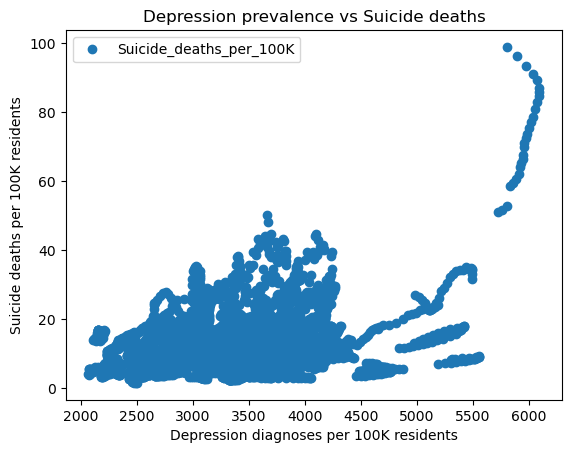

In [48]:
# Create scatterplot

df.plot(x = 'Depression_per_100K', y='Suicide_deaths_per_100K',style='o') 
plt.title('Depression prevalence vs Suicide deaths')  
plt.xlabel('Depression diagnoses per 100K residents')  
plt.ylabel('Suicide deaths per 100K residents')  
plt.show()

#It looks like there may be an upward trend, but data is too dense in earlier stages to be sure. We're also seeing evidence of high outliers, suggesting we may need to remove that data or limit the years analyzed 

In [50]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Depression_per_100K'].values.reshape(-1,1)
y = df['Suicide_deaths_per_100K'].values.reshape(-1,1)

In [52]:
#check output
X

array([[4039.755763],
       [4046.256034],
       [4053.709902],
       ...,
       [3068.250731],
       [3081.782858],
       [3094.795065]])

In [54]:
y

array([[10.31850413],
       [10.32701045],
       [10.27141119],
       ...,
       [27.19706124],
       [26.83959101],
       [26.39176915]])

In [56]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

04 Run Regression Analysis

In [59]:
#create regression object
regression = LinearRegression()

In [63]:
#fit regression object to training set
regression.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predict y values on the test set

y_predicted = regression.predict(X_test)

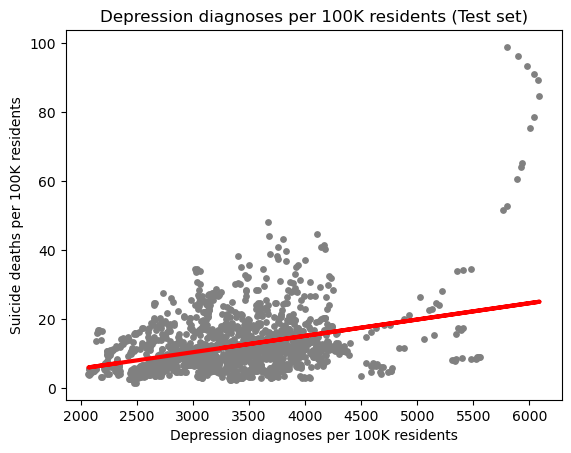

In [75]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Depression diagnoses per 100K residents (Test set)')
plot_test.xlabel('Depression diagnoses per 100K residents')
plot_test.ylabel('Suicide deaths per 100K residents')
plot_test.show()

INSIGHTS: The line of best fit shows a moderate positive correlation between depression and suicide rates. However, the extremely high values of suicide deaths may be affecting the analysis. let's look at the model summary statistics to learn more.

In [78]:
# Create objects for the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [80]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00472955]]
Mean squared error:  63.36670002566675
R2 score:  0.16259183100820118


RESULTS: The line has a slight positive slope and a seemingly large mean squared error. More importantly, the R2 score is only 0.16, suggesting a poor fit. Let's look at the values themselves, then see what happens when we eliminate the highest values.

In [83]:
# Create a dataframe comparing the actual and predicted values of y.

data_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_compare.head(30)

,Actual,Predicted
0,21.570477,11.632944
1,32.195796,12.759447
2,6.427481,15.639084
3,10.456176,11.270207
4,6.513566,9.606238
5,9.377806,11.060216
6,14.422615,13.920229
7,6.030311,13.811959
8,33.619483,10.567050
9,3.682298,12.052469


05 Find and Remove Outliers

In [92]:
#drop columns not involved in regression
df_regression = df.drop(columns=(['Entity', 'Code', 'Year', 'Country, Year', 'Schizophrenia_percent',
       'Bipolar_percent', 'Eating_percent', 'Anxiety_percent', 'Drug_percent',
       'Depression_percent', 'Alcohol_percent', 'All Ages', 'Age 10-14',
       'Age 15-19', 'Age 20-24', 'Age 25-29', 'Age 30-34', 'Age 50-69',
       'Age 70+', 'Age 15-49', 'Age Standardized', 'Males_percent',
       'Females_percent', 'Population', 'Number with depression']))

In [94]:
#check output
df_regression.head()

,Suicide_deaths_per_100K,Depression_per_100K
0,10.318504,4039.755763
1,10.327010,4046.256034
2,10.271411,4053.709902
3,10.376123,4060.203474
4,10.575915,4062.290365


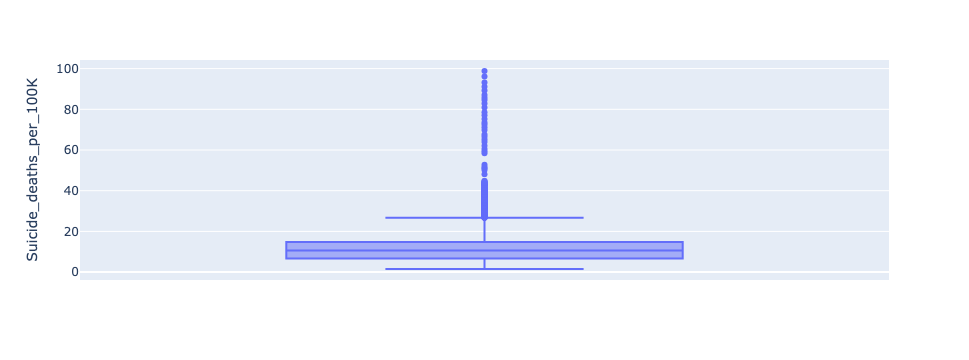

In [164]:
#create a box plot

fig = px.box(df_regression, y='Suicide_deaths_per_100K')

fig.show()

#upper fence is 26.66906. To test the validity of our regression without outliers, we will remove values above this point in this temporary dataframe only

In [174]:
# Create new temporary dataframe
cleaned_df_regression = df_regression[df_regression['Suicide_deaths_per_100K'] <= 26.66906]

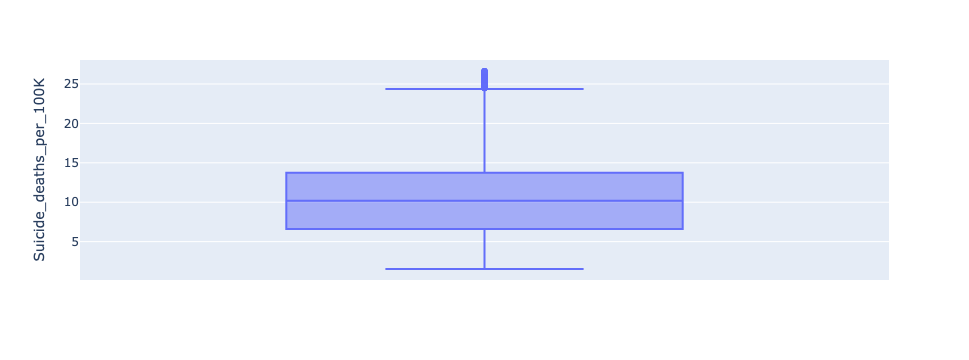

In [176]:
#Check output
fig = px.box(cleaned_df_regression, y='Suicide_deaths_per_100K')

fig.show()

#There are now significantly fewer outliers and we can try our regression again

06 Run regression analysis with cleaned dataframe

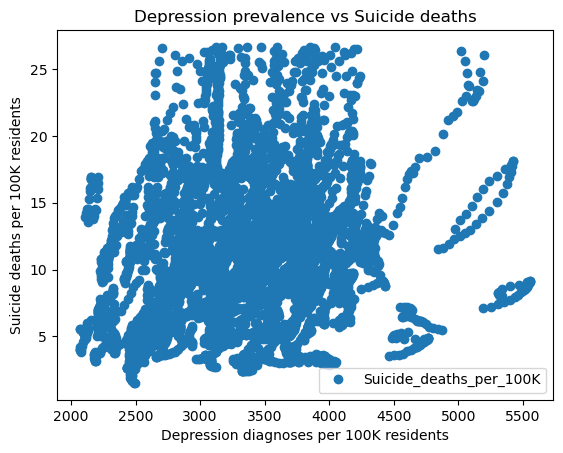

In [179]:
# Create scatterplot to check distribution

cleaned_df_regression.plot(x = 'Depression_per_100K', y='Suicide_deaths_per_100K',style='o') 
plt.title('Depression prevalence vs Suicide deaths')  
plt.xlabel('Depression diagnoses per 100K residents')  
plt.ylabel('Suicide deaths per 100K residents')  
plt.show()

#Less of a trend is visible. Let's complete the regression analysis to learn more.

In [181]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = cleaned_df_regression['Depression_per_100K'].values.reshape(-1,1)
y = cleaned_df_regression['Suicide_deaths_per_100K'].values.reshape(-1,1)

In [183]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [185]:
#fit regression object to training set (regression object already created)
regression.fit(X_train, y_train)

LinearRegression()

In [187]:
# Predict y values on the test set

y_predicted = regression.predict(X_test)

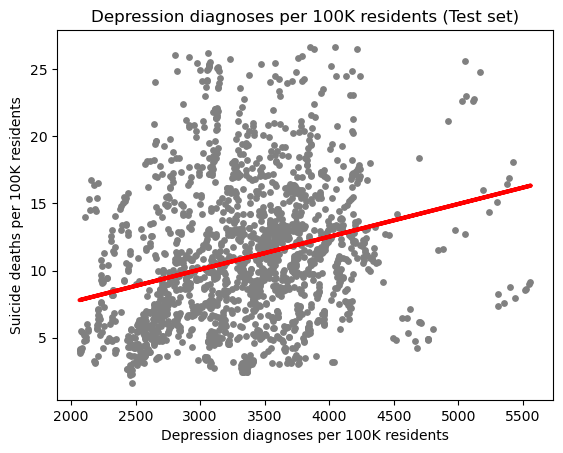

In [189]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Depression diagnoses per 100K residents (Test set)')
plot_test.xlabel('Depression diagnoses per 100K residents')
plot_test.ylabel('Suicide deaths per 100K residents')
plot_test.show()

INSIGHTS: The line of best fit appears to be stronger here, but we need to look at the numbers.

In [194]:
# Create new objects for the model summary statistics.

rmse_2 = mean_squared_error(y_test, y_predicted) 
r2_2 = r2_score(y_test, y_predicted) 

In [196]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[0.00243856]]
Mean squared error:  25.736863703919003
R2 score:  0.07404828062273594


RESULTS: While the slope may look steeper at first glance, the slope value is actually lower. With the outliers, the mean squared error was 63.36670002566675 with the outliers and R2 score was 0.16259183100820118. These new numbers suggest an even poorer fit. Let's look at the new dataframe to learn more.

In [199]:
# Create a dataframe comparing the actual and predicted values of y.

data_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_compare.head(30)

,Actual,Predicted
0,10.140585,11.267251
1,2.983806,10.893711
2,3.342883,10.032961
3,9.466526,8.322164
4,11.074010,10.964252
5,23.686596,10.422091
6,3.225221,11.792376
7,5.211584,11.132676
8,12.842521,10.686903
9,7.601178,11.084364


RESULTS: There are significant differences between the actual and predicted values. It's clear this data does not follow a linear model, which makes sense given the complex social and political factors involved in depression diagnosis and suicide records.

DATA BIAS CONCERNS: We don't have a clear picture of how this data was collected. That depression rates may not reflect reality if the collection method was limited to formal diagnosis numbers. Some patients may have gone undiagnosed, perhaps enough that hte correlation is actually much stronger. Unfortunately, we don't have the resources to collect more complete data.